In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_tissue_data, read_tissue_data
from dipy.segment.tissue import TissueClassifierHMRF
import nibabel as nib
import skimage.io as io
plt.figure()

ssss/t

(96, 128, 128)
(4, 4)
(96, 128, 128)


C:\Users\kjlya\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


(96, 128, 128)
(4, 4)
(96, 128, 128)
(96, 128, 128)
(4, 4)
(96, 128, 128)
(96, 128, 128)
(4, 4)
(96, 128, 128)


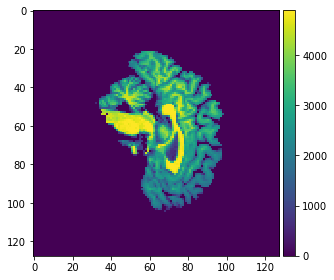

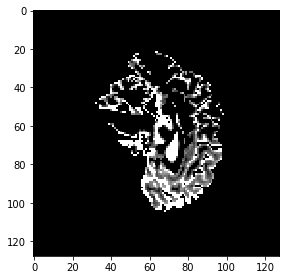

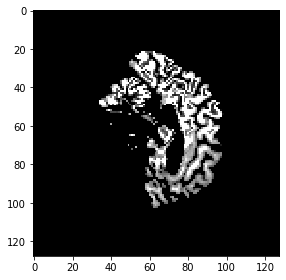

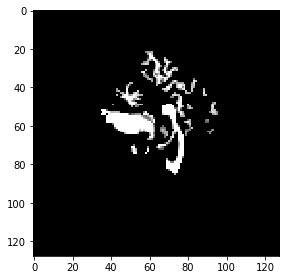

In [2]:
# segment the img via FSL's FAST:
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img = nib.load('d:/Downloads/neurodatadesign/output_data/flirt/sub-0025864/ses-1/anat/preproc/t1w_brain.nii.gz')
print(img.shape)
print(img.affine.shape)
img_arr = img.get_fdata()
print(img_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_arr[46])

# this is the CSF produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_csfprob = nib.load('d:/Downloads/neurodatadesign/output_data/flirt_1/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_0.nii.gz')
print(img_csfprob.shape)
print(img_csfprob.affine.shape)
img_csfprob_arr = img_csfprob.get_fdata()
print(img_csfprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_csfprob_arr[46])

# this is the greymatter produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_gmprob = nib.load('d:/Downloads/neurodatadesign/output_data/flirt_1/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_1.nii.gz')
print(img_gmprob.shape)
print(img_gmprob.affine.shape)
img_gmprob_arr = img_gmprob.get_fdata()
print(img_gmprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_gmprob_arr[46])

# this is the whitematter produced by FAST
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_vmprob = nib.load('d:/Downloads/neurodatadesign/output_data/flirt_1/sub-0025864/ses-1/anat/preproc/t1w_seg_pve_2.nii.gz')
print(img_vmprob.shape)
print(img_vmprob.affine.shape)
img_vmprob_arr = img_vmprob.get_fdata()
print(img_vmprob_arr.shape)
# img_arr = np.squeeze(img_arr)
io.imshow(img_vmprob_arr[46])

>> Iteration: 0
>> Iteration: 1
>> Iteration: 2
>> Iteration: 3
>> Iteration: 4
>> Iteration: 5
>> Iteration: 6
>> Iteration: 7
>> Iteration: 8
>> Iteration: 9
>> Iteration: 10
>> Iteration: 11
>> Iteration: 12
>> Iteration: 13
>> Iteration: 14
>> Iteration: 15
>> Iteration: 16
>> Iteration: 17
>> Iteration: 18
>> Iteration: 19
>> Iteration: 20
>> Iteration: 21
>> Iteration: 22
>> Iteration: 23
>> Iteration: 24
>> Iteration: 25
>> Iteration: 26
>> Iteration: 27
>> Iteration: 28
>> Iteration: 29
>> Iteration: 30
>> Iteration: 31
>> Iteration: 32
>> Iteration: 33
>> Iteration: 34
>> Iteration: 35
>> Iteration: 36
>> Iteration: 37
>> Iteration: 38
>> Iteration: 39
>> Iteration: 40
>> Iteration: 41
>> Iteration: 42
>> Iteration: 43
>> Iteration: 44
>> Iteration: 45
>> Iteration: 46
>> Iteration: 47
>> Iteration: 48
>> Iteration: 49
>> Iteration: 50
>> Iteration: 51
>> Iteration: 52
>> Iteration: 53
>> Iteration: 54
>> Iteration: 55
>> Iteration: 56
>> Iteration: 57
>> Iteration: 58
>> Iter

C:\Users\kjlya\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


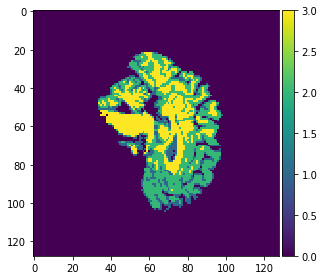

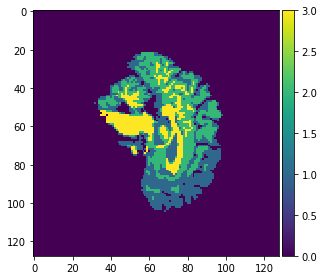

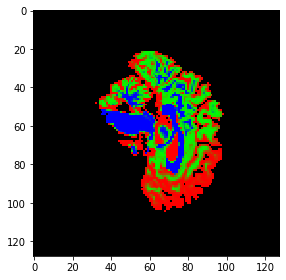

In [3]:
# segment the img by dipy's TissueClassifierHMRF

# first run the TissueClassifierHMRF to segment the t1w img
t1 = img_arr
nclass = 3
beta = 0.1
tolerance = 0
hmrf = TissueClassifierHMRF()
initial_segmentation, final_segmentation, PVE = hmrf.classify(t1, nclass, beta, tolerance)

# show the picture of initial_segmentation
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(initial_segmentation[46])

# show the picture of final_segmentation
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(final_segmentation[46])

# show 3D probability map of each tissue type
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
io.imshow(PVE[46])

In [4]:
# the picture of CSF, greymatter, whitematter
# CSF:
print(final_segmentation.shape)
# fig = plt.figure()
# a = fig.add_subplot(1, 1, 1)
img_dipy_0 = PVE[:, :, :,0]
# io.imshow(img_dipy_0)

# greymatter:
# fig = plt.figure()
# a = fig.add_subplot(1, 1, 1)
img_dipy_1 = PVE[:, :, :,1]
# io.imshow(img_dipy_1)

# whitematter:
# fig = plt.figure()
# a = fig.add_subplot(1, 1, 1)
img_dipy_2 = PVE[:, :, :,2]
# io.imshow(img_dipy_2)
print(img_dipy_2.shape)


(96, 128, 128)
(96, 128, 128)


In [5]:
import warnings
warnings.simplefilter("ignore")
import nibabel as nib
import numpy as np
import nilearn.image as nl
import torch as torch
import os
import os.path as op
import pytest

#set input paths
# warped_fsl = r"/Users/xueminzhu/Desktop/test/tests_output/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_skull.nii.gz"
# warped_dipy= r"/Users/xueminzhu/Desktop/test/dipywarp.nii.gz"
#warped_original = r"/Users/xueminzhu/Desktop/test/tests_input/desikan_space-MNI152NLin6_res-2x2x2_reor_RAS_nores_aligned_atlas_t1w_mni.nii.gz"

#warped_original_data=nib.load(str(warped_original)).get_fdata()
#X = torch.from_numpy(warped_original_data)

# warped_dipy_data=nib.load(str(warped_dipy)).get_fdata()
# Y1 = torch.from_numpy(img_vmprob_arr)
Y1 = img_vmprob_arr

# warped_fsl_data=nib.load(str(warped_fsl)).get_fdata()
# Y2 = torch.from_numpy(img_dipy_2)
Y2 = img_dipy_2

#iflat = X.contiguous().view(-1)
# tflat1 = Y1.contiguous().view(-1)
# tflat2 = Y2.contiguous().view(-1)

#intersection1 = (iflat * tflat1).sum()
#intersection2 = (iflat * tflat2).sum()
# intersection2 = (tflat1 * tflat2).sum()
intersection2 = sum((Y1 * Y2))
#X_sum = torch.sum(iflat * iflat)
# Y1_sum = torch.sum(tflat1 * tflat1)
Y1_sum = sum(Y1*Y1)
# Y2_sum = torch.sum(tflat2 * tflat2)
Y2_sum = sum(Y2*Y2)

#ans1 = 1 - ((2. * intersection1 + 1.) / (X_sum + Y1_sum + 1.))
ans2 = 1 - ((2. * intersection2) / (Y1_sum + Y2_sum))

# print (ans2)

C:\Users\kjlya\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
def dice_score(A,B):
    """
    A: Baseline numpy array to be compared
    B: Alternative numpy arrray to be compared
    
    out: dice score
    """
    #smooth
    smooth = 1.0
    #convert to torch tensor and flatten
    A_flat = torch.from_numpy(A).contiguous().view(-1)
    B_flat = torch.from_numpy(B).contiguous().view(-1)
    
    #calc dice components
    intersection = (A_flat * B_flat).sum()
    A_sum = torch.sum(A_flat*A_flat)
    B_sum = torch.sum(B_flat*B_flat)
    
    #calc dice
    dice = 1.0-(2. * intersection + smooth)/(A_sum + B_sum + smooth)
    
    return dice

print(dice_score(img_vmprob_arr, img_dipy_2))
print(dice_score(img_gmprob_arr, img_dipy_1))
print(dice_score(img_csfprob_arr, img_dipy_0))
print(dice_score(img_arr,img_arr))

tensor(0.0421, dtype=torch.float64)
tensor(0.0905, dtype=torch.float64)
tensor(0.0630, dtype=torch.float64)
tensor(0., dtype=torch.float64)
